In [1]:
# Importing essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced data visualization (built on Matplotlib)

# Importing machine learning tools
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error  # For evaluating model performance
from sklearn.ensemble import RandomForestRegressor  # For using the Random Forest algorithm (a robust ensemble method for regression)

# Setting options for pandas to display all columns in outputs
pd.set_option('display.max_columns', None)  # Ensures no columns are hidden when printing a DataFrame

# Enabling inline plotting in Jupyter Notebook
%matplotlib inline  


In [2]:
# Loading a Parquet file into a pandas DataFrame
taxi = pd.read_parquet(f'../data/raw/yellow_tripdata_2023-01.parquet')

# Explanation:
# - This line reads a Parquet file containing raw taxi trip data from January 2023.
# - Parquet is a columnar storage file format optimized for performance and data compression.
# - The resulting DataFrame, 'taxi', will hold the data for further analysis or processing.
# - The file path '../data/raw/' indicates the location of the Parquet file relative to the current working directory.


In [3]:
# Displaying the first five rows of the DataFrame
taxi.head()

# Explanation:
# - The .head() method is used to view the first few rows of the DataFrame.
# - By default, it displays the first five rows, giving a quick overview of the dataset structure and content.
# - This is helpful for inspecting column names, data types, and sample data before performing further analysis.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
# Retrieving the column names of the DataFrame
taxi.columns

# Explanation:
# - The .columns attribute is used to list all the column names in the DataFrame.
# - This is helpful for understanding the structure of the dataset and identifying the available variables.


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
# Displaying a summary of the DataFrame
taxi.info()

# Explanation:
# - The .info() method provides a concise summary of the DataFrame.
# - It includes:
#   - The number of non-null values in each column.
#   - The data type (dtype) of each column.
#   - The total memory usage of the DataFrame.
# - This is useful for understanding the dataset's structure, identifying missing values, and verifying data types.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
# Checking for missing values in the DataFrame
taxi.isnull().sum()

# Explanation:
# - The .isnull() method returns a DataFrame of the same shape, with True for missing (null) values and False otherwise.
# - The .sum() method calculates the total number of missing values for each column.
# - This helps in identifying columns with missing data, which is crucial for data cleaning and preprocessing.


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

In [7]:
# Selecting numeric columns for further analysis
var_num = [
    var for var in taxi.columns  # Iterate over all column names in the DataFrame
    if taxi[var].dtypes != 'object'  # Include only columns with non-object (numeric) data types
    and var not in ['tip_amount', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']  
    # Exclude specific columns that are either irrelevant or do not fit the analysis criteria
    and len(taxi[var].unique()) > 20  # Include columns with more than 20 unique values to avoid categorical-like features
]

# Explanation:
# - This code creates a list of numeric variables for further analysis or modeling.
# - It filters out:
#   - Columns with data types categorized as "object" (e.g., strings).
#   - Specific columns ('tip_amount', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime') based on domain knowledge.
#   - Columns with 20 or fewer unique values, which are likely categorical variables.
# - This is often used for selecting features for numerical analysis or machine learning models.


In [8]:
# Selecting discrete numeric columns
var_dis = [
    var for var in taxi.columns  # Iterate over all column names in the DataFrame
    if taxi[var].dtypes != 'object'  # Include only columns with non-object (numeric) data types
    and len(taxi[var].unique()) <= 20  # Include columns with 20 or fewer unique values, indicating discrete variables
]

# Explanation:
# - This code creates a list of discrete numeric variables for further analysis.
# - It filters out:
#   - Columns with "object" data types (e.g., strings), focusing only on numeric data.
#   - Numeric columns with more than 20 unique values, as they are likely continuous variables.
# - The resulting list, `var_dis`, contains discrete numeric features, which are often used for categorical analysis or grouping.


In [9]:
# Selecting datetime columns
var_date = [
    var for var in taxi.columns  # Iterate over all column names in the DataFrame
    if taxi[var].dtypes == 'datetime64[us]'  # Include only columns with datetime data type (datetime64 with microsecond precision)
]

# Explanation:
# - This code creates a list of columns in the DataFrame that contain datetime values.
# - It filters columns where the data type is 'datetime64[us]', which indicates a timestamp with microsecond precision.
# - The resulting list, `var_date`, will contain columns representing date and time information, useful for time-based analysis or feature extraction.


In [10]:
# Selecting categorical (object) columns
var_obj = [
    var for var in taxi.columns  # Iterate over all column names in the DataFrame
    if taxi[var].dtypes == 'object'  # Include only columns with 'object' data type, typically used for categorical or text data
]

# Explanation:
# - This code creates a list of columns in the DataFrame that contain categorical or string data.
# - It filters out columns with non-object data types (numeric, datetime), focusing on columns with text or categorical values.
# - The resulting list, `var_obj`, will contain categorical features, which can be used for encoding or further analysis.


In [11]:
print(var_num)

['trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'tolls_amount', 'total_amount']


In [12]:
print(var_obj)

['store_and_fwd_flag']


In [13]:
print(var_dis)

['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']


In [14]:
print(var_date)

['tpep_pickup_datetime', 'tpep_dropoff_datetime']


Numerical Variables

In [15]:
# Generating summary statistics for the numeric columns
taxi[var_num].describe()

# Explanation:
# - The .describe() method is used to generate a summary of statistics for the numeric columns in the 'var_num' list.
# - It provides key statistics such as:
#   - Count: Number of non-null entries.
#   - Mean: Average value.
#   - Standard deviation (std): Measure of spread.
#   - Min: Minimum value.
#   - 25%, 50%, 75% percentiles: Values at the 25th, 50th, and 75th percentiles.
#   - Max: Maximum value.
# - This is useful for quickly understanding the distribution and central tendency of the numeric variables in the dataset.


,trip_distance,PULocationID,DOLocationID,fare_amount,extra,tolls_amount,total_amount
count,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06
mean,3.847342e+00,1.663980e+02,1.643926e+02,1.836707e+01,1.537842e+00,5.184907e-01,2.702038e+01
std,2.495838e+02,6.424413e+01,6.994368e+01,1.780782e+01,1.789592e+00,2.017579e+00,2.216359e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,-7.500000e+00,-6.500000e+01,-7.510000e+02
25%,1.060000e+00,1.320000e+02,1.140000e+02,8.600000e+00,0.000000e+00,0.000000e+00,1.540000e+01
50%,1.800000e+00,1.620000e+02,1.620000e+02,1.280000e+01,1.000000e+00,0.000000e+00,2.016000e+01
75%,3.330000e+00,2.340000e+02,2.340000e+02,2.050000e+01,2.500000e+00,0.000000e+00,2.870000e+01
max,2.589281e+05,2.650000e+02,2.650000e+02,1.160100e+03,1.250000e+01,1.969900e+02,1.169400e+03


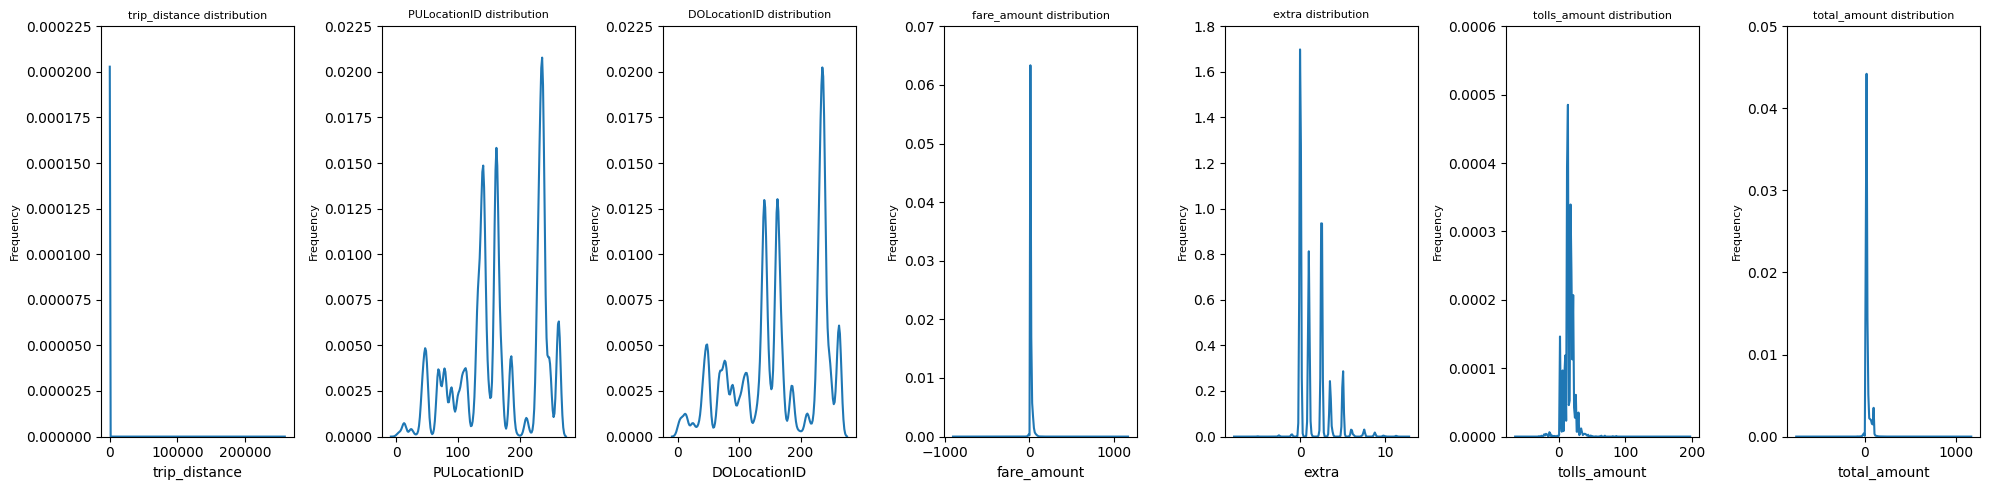

In [16]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(var_num),    # The number of columns is equal to the number of numerical columns
    figsize=(20, 5)        # Set the figure size to (20, 5) inches
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(var_num):
    # Plot a Kernel Density Estimate (KDE) to visualize the distribution of each numerical column
    sns.kdeplot(data=taxi, x=col, ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels for consistency
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency' to clarify the KDE visualization
    ax[id].set_ylabel('Frequency', fontsize=8)
# Adjust subplot spacing to prevent overlapping of elements and improve readability
plt.tight_layout()


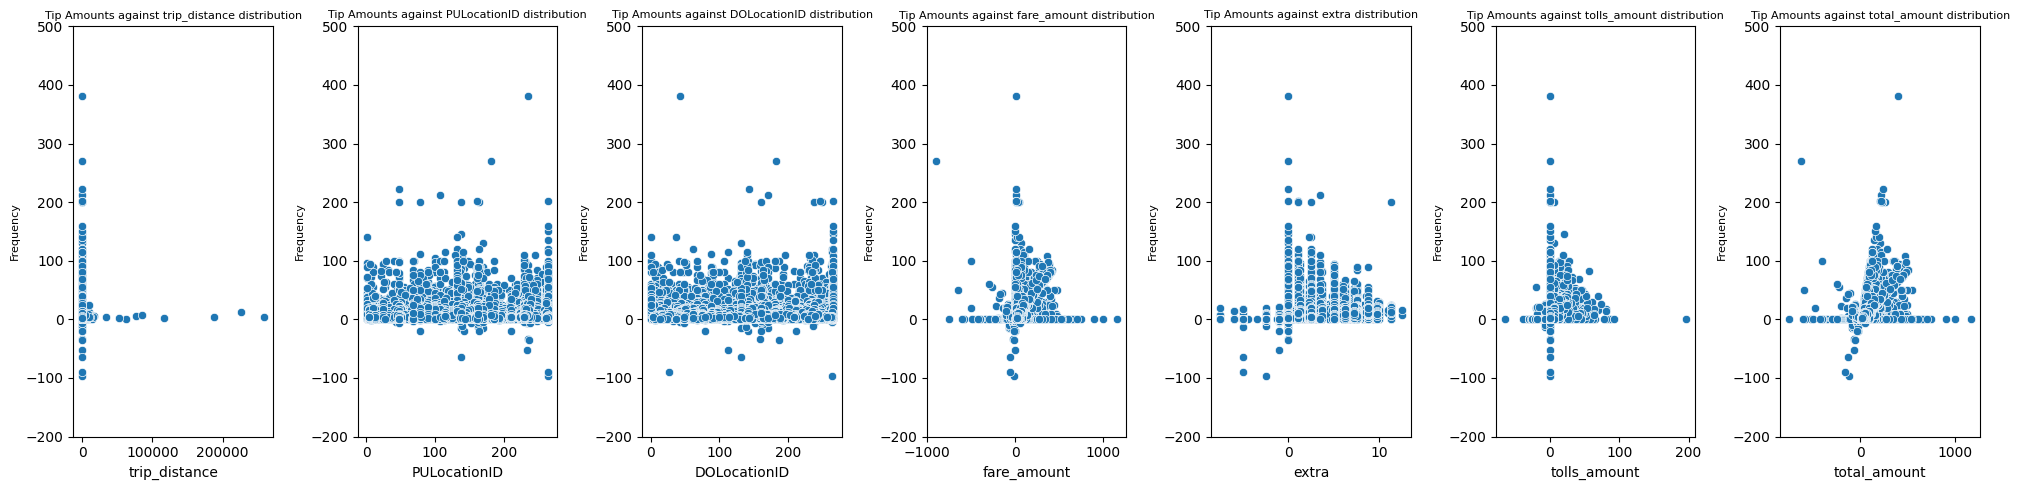

In [17]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(var_num),    # The number of columns is equal to the number of numerical columns
    figsize=(20, 5)        # Set the figure size to (20, 5) inches
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(var_num):
    # Plot a scatter plot to visualize the relationship between the numerical column and 'tip_amount'
    sns.scatterplot(data=taxi, x=col, y='tip_amount', ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels for consistency and readability
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name and its relationship with 'tip_amount'
    ax[id].set_title(f'Tip Amounts against {col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency' (you might want to adjust this for clarity as the plot is showing relationships)
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements and improve readability
plt.tight_layout()


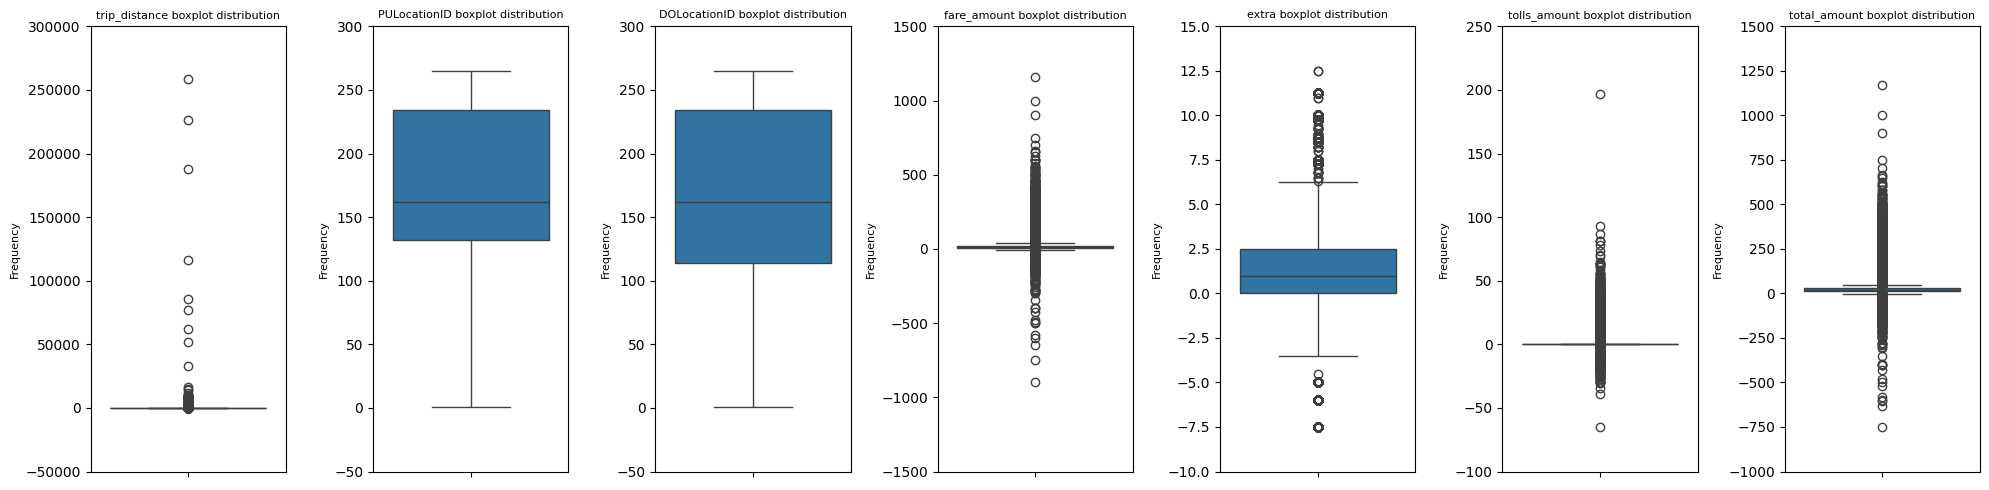

In [18]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(var_num),    # The number of columns is equal to the number of numerical columns
    figsize=(20, 5)        # Set the figure size to (20, 5) inches
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(var_num):
    # Plot a boxplot to visualize the distribution and outliers of the numerical column
    sns.boxplot(data=taxi, y=col, ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels for consistency and readability
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name and its distribution
    ax[id].set_title(f'{col} boxplot distribution', fontsize=8)
    # Label the y-axis as 'Frequency' (though boxplots don't represent frequency, consider using 'Value' or similar)
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements and improve readability
plt.tight_layout()


In [19]:
# Checking the number of missing values in each numerical column
taxi[var_num].isna().sum()

# Explanation:
# - The .isna() method returns a DataFrame of the same shape, with True for missing (NaN) values and False otherwise.
# - The .sum() method calculates the total number of missing (NaN) values for each numerical column listed in 'var_num'.
# - This is useful for identifying columns with missing data, which is important for data cleaning and handling missing values.


trip_distance    0
PULocationID     0
DOLocationID     0
fare_amount      0
extra            0
tolls_amount     0
total_amount     0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

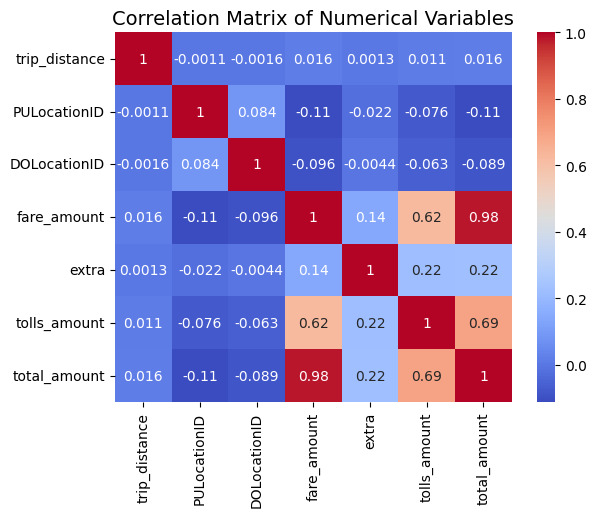

In [20]:
# Plotting a heatmap of the correlation matrix for numerical columns
sns.heatmap(taxi[var_num].corr(), annot=True, cmap='coolwarm')

# Adding a title to the heatmap
plt.title('Correlation Matrix of Numerical Variables', fontsize=14)

# Explanation:
# - The sns.heatmap() function is used to plot the correlation matrix of the numerical columns in 'var_num'.
# - annot=True adds the correlation coefficient values inside the heatmap cells.
# - cmap='coolwarm' sets the color scheme for the heatmap, with blue representing negative correlations and red representing positive correlations.
# - plt.title() adds a title to the heatmap for clarity and context.


In [21]:
# Calculating the correlation of each numerical column with the 'tip_amount' column
print(taxi[var_num].corrwith(taxi['tip_amount']))

# Explanation:
# - The .corrwith() method computes the pairwise correlation between the 'tip_amount' column and each of the numerical columns in 'var_num'.
# - This helps identify which numerical variables have the strongest linear relationship with 'tip_amount'.
# - The result is a pandas Series where each element is the correlation coefficient between 'tip_amount' and a numerical column.


trip_distance    0.011158
PULocationID    -0.061634
DOLocationID    -0.044308
fare_amount      0.590152
extra            0.174518
tolls_amount     0.464598
total_amount     0.709618
dtype: float64


Discreet Variables 

In [22]:
# Checking the number of missing values in each discrete numerical column
taxi[var_dis].isna().sum()

# Explanation:
# - The .isna() method is used to identify missing (NaN) values in the specified columns (those in 'var_dis').
# - The .sum() method calculates the total number of missing (NaN) values for each of the discrete numerical columns.
# - This is useful for identifying columns with missing data, which can guide you in deciding how to handle the missing values (e.g., imputation, removal).


VendorID                     0
passenger_count          71743
RatecodeID               71743
payment_type                 0
mta_tax                      0
improvement_surcharge        0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

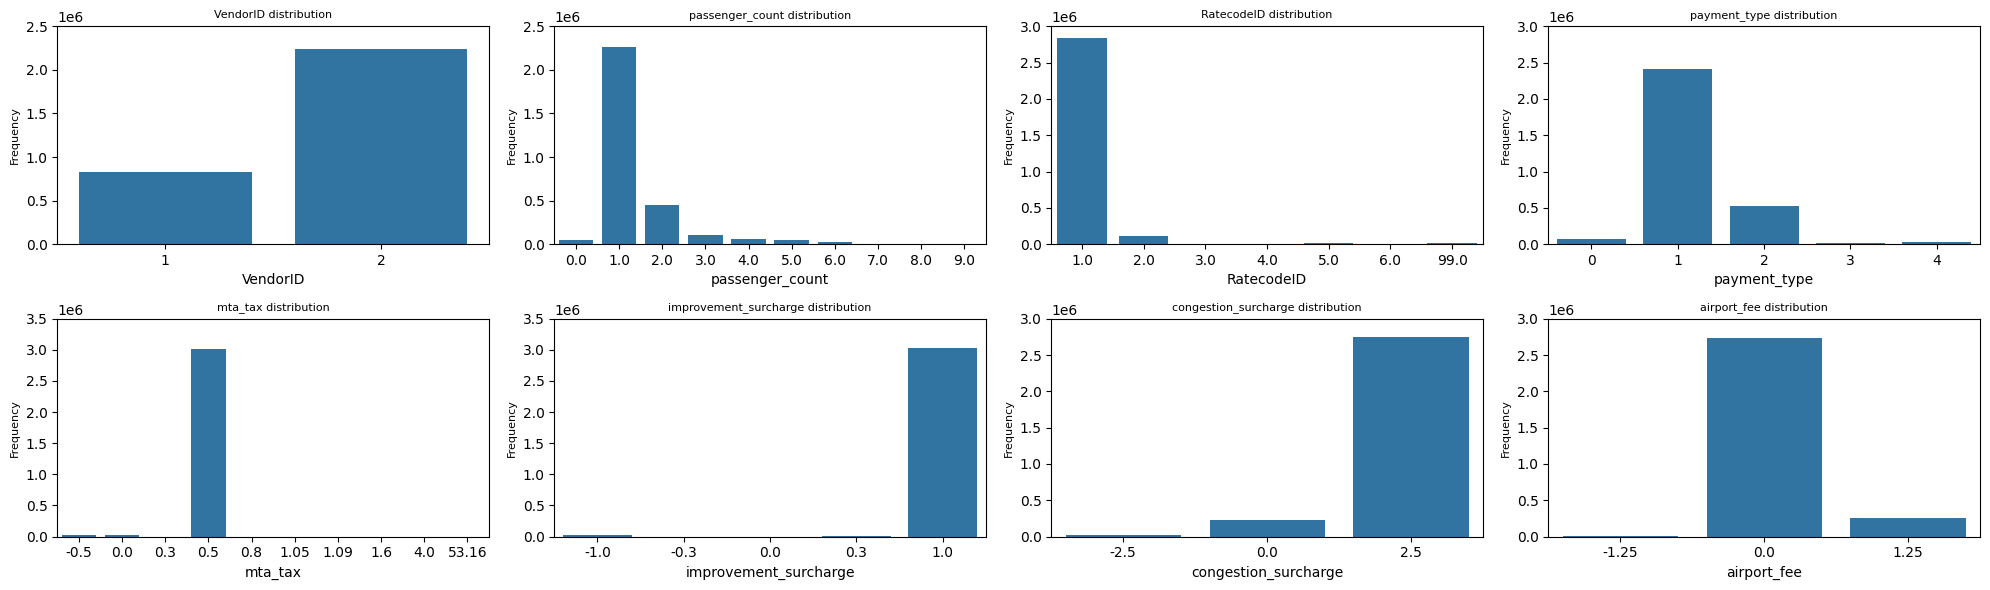

In [23]:
# Create a 2x4 grid of subplots to display countplots for each discrete numerical column
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 6))  # 2 rows and 4 columns of subplots
ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array to easily loop over

# Loop through each discrete column and its corresponding subplot
for idx, col in enumerate(var_dis):
    # Plot a countplot for each discrete variable
    sns.countplot(x=col, data=taxi, ax=ax[idx])
    # Set y-axis ticks for better visibility
    ax[idx].set_yticks(ax[idx].get_yticks())
    # Adjust the size of the y-axis tick labels for consistency and readability
    ax[idx].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name and its distribution
    ax[idx].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency' to clarify the count plot representation
    ax[idx].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()
# Display the plot
plt.show()


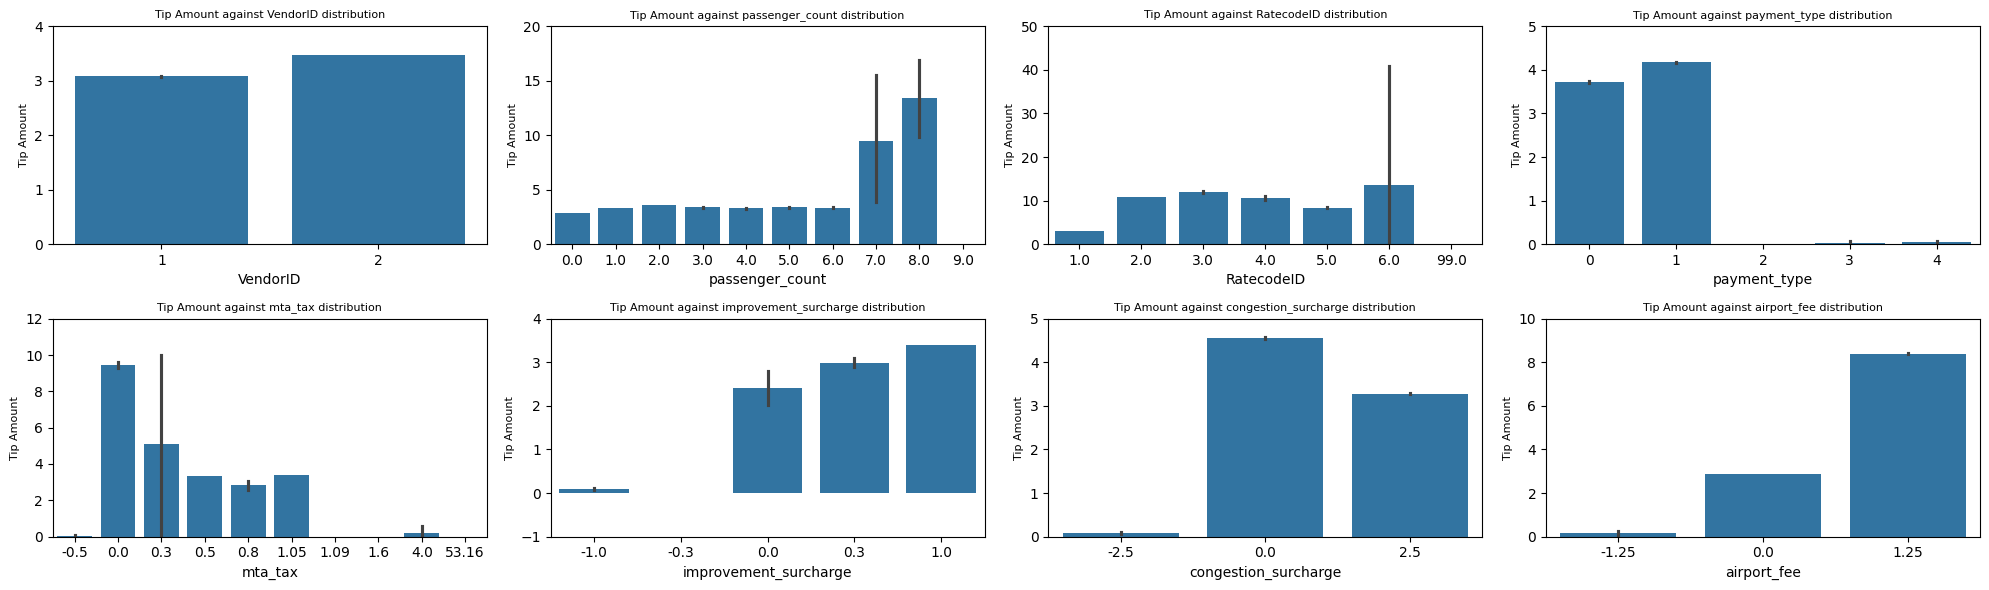

In [24]:
# Create a 2x4 grid of subplots to display barplots for each discrete numerical column against 'tip_amount'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 6))  # 2 rows and 4 columns of subplots
ax = ax.flatten()  # Flatten the 2D array of axes into a 1D array to easily loop over
# Loop through each discrete column and its corresponding subplot
for idx, col in enumerate(var_dis):
    # Plot a barplot for each discrete variable against 'tip_amount'
    sns.barplot(x=col, y='tip_amount', data=taxi, ax=ax[idx])
    # Set y-axis ticks for better visibility
    ax[idx].set_yticks(ax[idx].get_yticks())
    # Adjust the size of the y-axis tick labels for consistency and readability
    ax[idx].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name and its relationship with 'tip_amount'
    ax[idx].set_title(f'Tip Amount against {col} distribution', fontsize=8)
    # Label the y-axis as 'Tip Amount' since the y-axis represents the 'tip_amount' values
    ax[idx].set_ylabel('Tip Amount', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()
# Display the plot
plt.show()


In [25]:
# Loop through each discrete column to handle missing values by filling them with the mode
for col in var_dis:
    # Calculate the mode (most frequent value) of the column
    mode_val = taxi[col].mode()[0]
    # Replace missing values (NaN) in the column with the mode value
    taxi[col] = taxi[col].fillna(mode_val)

# Explanation:
# - The loop iterates through each column in 'var_dis', which contains discrete numerical variables.
# - The .mode() function returns the most frequent value(s) in the column. We select the first mode using [0].
# - The .fillna() method is used to fill missing (NaN) values in each column with the mode value, effectively handling missing data.


Object Variable

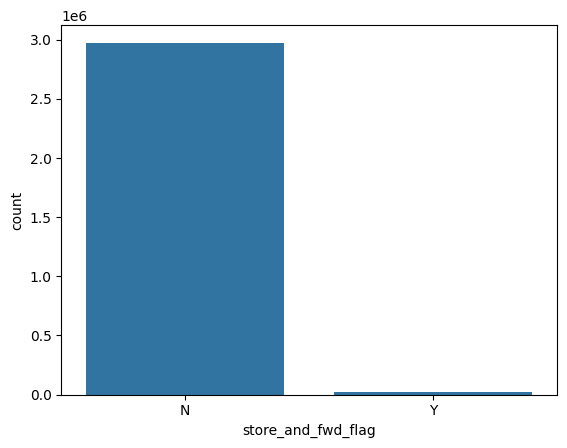

In [26]:
# Loop through each object (categorical) column and create a countplot for its distribution
for col in var_obj:
    # Create a countplot to visualize the frequency of each category in the column
    sns.countplot(x=col, data=taxi)

# Explanation:
# - The loop iterates through each column in 'var_obj', which contains categorical or object-type variables.
# - The sns.countplot() function creates a bar plot that shows the count (frequency) of each unique value in the column.
# - This helps visualize the distribution of categorical variables, which is useful for understanding the class distribution or frequency of categories.


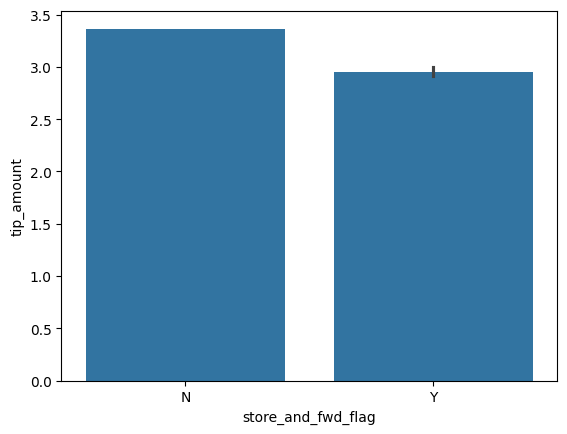

In [27]:
# Loop through each object (categorical) column and create a barplot to show the relationship with 'tip_amount'
for col in var_obj:
    # Create a barplot to show the relationship between the categorical column and 'tip_amount'
    sns.barplot(x=col, y='tip_amount', data=taxi)

# Explanation:
# - The loop iterates through each column in 'var_obj', which contains categorical or object-type variables.
# - The sns.barplot() function is used to visualize the relationship between each categorical variable (x-axis) and the continuous variable 'tip_amount' (y-axis).
# - It computes the mean of 'tip_amount' for each category in the column and displays it as a bar plot.
# - This helps to understand how the 'tip_amount' varies across different categories in the categorical variables.


In [28]:
# Loop through each object (categorical) column to handle missing values by filling with the second most frequent mean 'tip_amount'
for col in var_obj:
    # Group by the categorical column and calculate the mean 'tip_amount' for each category
    # Select the second most frequent mean value (index[1])
    var = taxi.groupby(col)['tip_amount'].mean().index[1]
    # Replace missing values (NaN) in the column with the selected mean 'tip_amount' value
    taxi[col] = taxi[col].fillna(var)

# Explanation:
# - The loop iterates through each column in 'var_obj', which contains categorical variables.
# - The code groups the data by the categorical column (`col`) and calculates the mean `tip_amount` for each category.
# - The `.index[1]` selects the second most frequent category based on the mean 'tip_amount'. If you want to replace with a specific value, you can adjust the selection criteria (e.g., mode, median).
# - The `.fillna()` method is then used to replace any NaN values in the categorical column with the selected mean value of 'tip_amount'.


In [29]:
# Loop through each object (categorical) column to encode it using the mean 'tip_amount' for each category
for col in var_obj:
    # Create a dictionary to map each category in the column to an index based on the mean 'tip_amount'
    label_mapper = {var: idx for idx, (var, _) in enumerate(taxi.groupby(col)['tip_amount'].mean().items())}
    # Replace each category in the column with its corresponding index using the label_mapper
    taxi[col] = taxi[col].map(label_mapper)

# Explanation:
# - The loop iterates through each column in 'var_obj', which contains categorical or object-type variables.
# - The `taxi.groupby(col)['tip_amount'].mean()` calculates the mean of 'tip_amount' for each category in the column `col`.
# - `enumerate()` is used to create an index for each category based on the mean 'tip_amount'.
# - The dictionary `label_mapper` is then created, where the keys are the categories, and the values are the corresponding indices.
# - The `.map()` function is used to replace each category in the column with its corresponding index as defined in the `label_mapper`.


Feature Engineering

In [30]:
# Filter out rows where 'trip_distance' is zero, as it doesn't make sense for a trip to have zero distance
taxi = taxi[taxi['trip_distance'] != 0]
# Filter out rows where 'fare_amount' is zero, as it indicates invalid or incomplete data
taxi = taxi[taxi['fare_amount'] != 0]
# Filter out rows where 'PULocationID' (Pickup Location) is the same as 'DOLocationID' (Dropoff Location), 
# since these trips would not make sense (i.e., the pickup and dropoff locations are identical)
taxi = taxi[taxi['PULocationID'] != taxi['DOLocationID']]


In [31]:
# Replace zero values in 'passenger_count' with 1, as a passenger count of zero is not realistic for a trip
taxi['passenger_count'] = taxi['passenger_count'].replace(0, 1)

# Calculate the duration of each trip in minutes by subtracting pickup time from dropoff time
# The result is converted from seconds to minutes
taxi['duration'] = (taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate the fare per passenger by dividing 'fare_amount' by 'passenger_count'
taxi['fare_per_passenger'] = taxi['fare_amount'] / taxi['passenger_count']

# Calculate the fare per distance traveled by dividing 'fare_amount' by 'trip_distance'
taxi['fare_per_dist'] = taxi['fare_amount'] / taxi['trip_distance']


In [32]:
# Drop the columns in 'var_date' (which contain datetime data) from the DataFrame
taxi.drop(var_date, axis=1, inplace=True)

# Explanation:
# - The 'var_date' list contains the names of the columns that are of datetime type ('datetime64[us]').
# - The `drop()` method is used to remove these columns from the DataFrame.
# - The parameter `axis=1` indicates that we want to drop columns (not rows).
# - The `inplace=True` argument ensures that the changes are applied directly to the `taxi` DataFrame, without the need to create a new DataFrame.


In [33]:
# Create the feature matrix 'X' by dropping the 'tip_amount' column from the DataFrame
X = taxi.drop(labels='tip_amount', axis=1)

# Create the target variable 'y' by selecting the 'tip_amount' column from the DataFrame
y = taxi['tip_amount']

# Explanation:
# - 'X' represents the feature matrix, which contains all the columns except for 'tip_amount'. 
#   This is done by using the `drop()` method with `axis=1` to remove the target column ('tip_amount').
# - 'y' represents the target variable, which is the 'tip_amount' column in the DataFrame.
# - The model will use 'X' (features) to predict 'y' (target variable).


In [34]:
# Split the dataset into training and testing sets with 30% of the data reserved for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Explanation:
# - `train_test_split()` is a function from scikit-learn that splits the feature matrix 'X' and target variable 'y' into training and testing sets.
# - `X` contains the features, and `y` contains the target variable ('tip_amount').
# - `test_size=0.3` means 30% of the data will be used for testing, while the remaining 70% will be used for training the model.
# - `random_state=32` ensures that the split is reproducible. Using the same `random_state` value will generate the same split each time the code is run.


In [35]:
# Initialize a Linear Regression model
lin = LinearRegression()

# Evaluate the model on the test data and print the R-squared score (coefficient of determination)
# This score represents the proportion of variance explained by the model on the test set
# Fit the linear regression model on the training data
lin.fit(x_train, y_train)
# Print the R-squared score (coefficient of determination) for the test data
test_score = lin.score(x_test, y_test)
print(f'R-squared (Test): {test_score:.4f}')
# Print the R-squared score (coefficient of determination) for the training data
train_score = lin.score(x_train, y_train)
print(f'R-squared (Train): {train_score:.4f}')
# Calculate and print the Mean Absolute Error (MAE) on the test data
mae = mean_absolute_error(y_test, lin.predict(x_test))
print(f'Mean Absolute Error (MAE): {mae:.4f}')
# Calculate and print the Root Mean Squared Error (RMSE) on the test data
rmse = root_mean_squared_error(y_test, lin.predict(x_test))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')



R-squared (Test): 0.9944
R-squared (Train): 0.9943
Mean Absolute Error (MAE): 0.1195
Root Mean Squared Error (RMSE): 0.2852


In [36]:
# Fit the Random Forest Regressor model on the training data
rand = RandomForestRegressor()
rand.fit(x_train, y_train)

# Print the R-squared score (coefficient of determination) for the test data
test_score_rand = rand.score(x_test, y_test)
print(f'Random Forest R-squared (Test): {test_score_rand:.4f}')
# Print the R-squared score (coefficient of determination) for the training data
train_score_rand = rand.score(x_train, y_train)
print(f'Random Forest R-squared (Train): {train_score_rand:.4f}')
# Calculate and print the Mean Absolute Error (MAE) on the test data
mae_rand = mean_absolute_error(y_test, rand.predict(x_test))
print(f'Random Forest Mean Absolute Error (MAE): {mae_rand:.4f}')
# Calculate and print the Root Mean Squared Error (RMSE) on the test data
rmse_rand = root_mean_squared_error(y_test, rand.predict(x_test))
print(f'Random Forest Root Mean Squared Error (RMSE): {rmse_rand:.4f}')


Random Forest R-squared (Test): 0.9923
Random Forest R-squared (Train): 0.9987
Random Forest Mean Absolute Error (MAE): 0.0332
Random Forest Root Mean Squared Error (RMSE): 0.3341


In [37]:
# Fit the Random Forest Regressor model with max_features set to 0.75
rand_1 = RandomForestRegressor(max_features=0.75)
rand_1.fit(x_train, y_train)
# Print the R-squared score (coefficient of determination) for the test data
test_score_rand_1 = rand_1.score(x_test, y_test)
print(f'Random Forest (max_features=0.75) R-squared (Test): {test_score_rand_1:.4f}')
# Print the R-squared score (coefficient of determination) for the training data
train_score_rand_1 = rand_1.score(x_train, y_train)
print(f'Random Forest (max_features=0.75) R-squared (Train): {train_score_rand_1:.4f}')
# Calculate and print the Mean Absolute Error (MAE) on the test data
mae_rand_1 = mean_absolute_error(y_test, rand_1.predict(x_test))
print(f'Random Forest (max_features=0.75) Mean Absolute Error (MAE): {mae_rand_1:.4f}')
# Calculate and print the Root Mean Squared Error (RMSE) on the test data
rmse_rand_1 = root_mean_squared_error(y_test, rand_1.predict(x_test))
print(f'Random Forest (max_features=0.75) Root Mean Squared Error (RMSE): {rmse_rand_1:.4f}')


Random Forest (max_features=0.75) R-squared (Test): 0.9916
Random Forest (max_features=0.75) R-squared (Train): 0.9986
Random Forest (max_features=0.75) Mean Absolute Error (MAE): 0.0362
Random Forest (max_features=0.75) Root Mean Squared Error (RMSE): 0.3484
